https://www.learnpytorch.io/02_pytorch_classification/

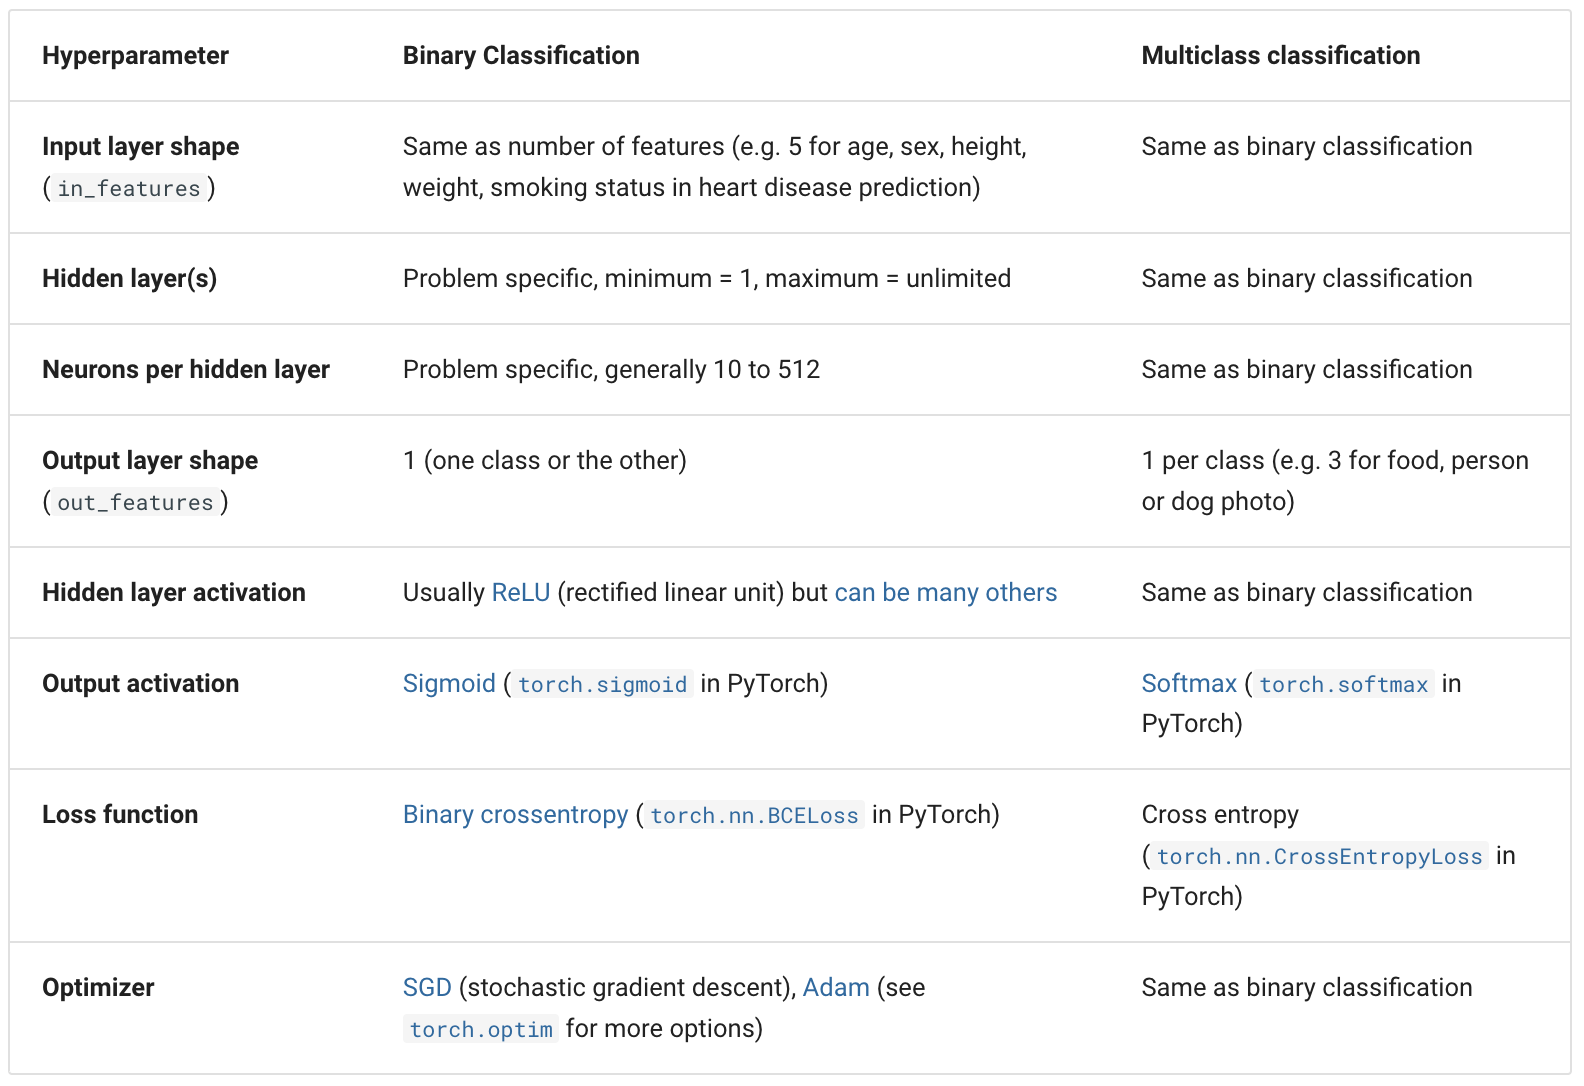

# Make classification data and get it ready

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=123)

print(f"First 10 of x:\n{x[:10]}")
print(f"First 10 of y:\n{y[:10]}")

First 10 of x:
[[-0.07903747  1.02380474]
 [-0.83268459  0.55400603]
 [ 0.80536475  0.53489832]
 [ 0.42014501  0.6805624 ]
 [-0.12995119  0.98457024]
 [-0.03823615  0.80720463]
 [-0.56007585 -0.82380805]
 [ 0.8381019  -0.47052305]
 [ 0.51353937 -0.61382559]
 [ 0.93583093 -0.24567093]]
First 10 of y:
[0 0 0 1 0 1 0 0 1 0]


In [2]:
# Make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"x1":x[:,0],
                        "x2":x[:,1],
                       "label":y})

circles.head(10)


,x1,x2,label
0,-0.079037,1.023805,0
1,-0.832685,0.554006,0
2,0.805365,0.534898,0
3,0.420145,0.680562,1
4,-0.129951,0.984570,0
5,-0.038236,0.807205,1
6,-0.560076,-0.823808,0
7,0.838102,-0.470523,0
8,0.513539,-0.613826,1
9,0.935831,-0.245671,0


In [3]:
circles["label"].value_counts()

0    500
1    500
Name: label, dtype: int64

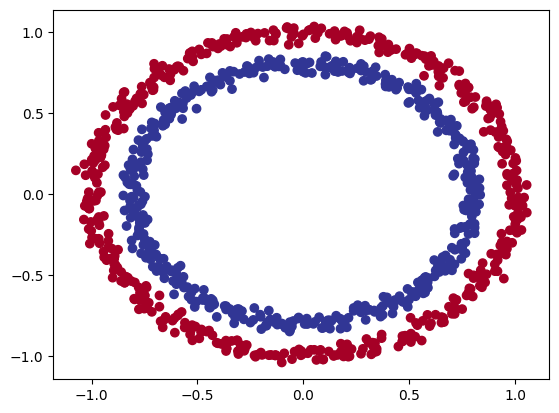

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=circles["x1"],
           y=circles["x2"],
           c=circles["label"],
           cmap=plt.cm.RdYlBu)

## Turn data into tensors and create train and test splits

In [5]:
x.shape, y.shape

((1000, 2), (1000,))

In [6]:
circles.head()

,x1,x2,label
0,-0.079037,1.023805,0
1,-0.832685,0.554006,0
2,0.805365,0.534898,0
3,0.420145,0.680562,1
4,-0.129951,0.984570,0


In [7]:
circles[["x1","x2"]].to_numpy()

array([[-0.07903747,  1.02380474],
       [-0.83268459,  0.55400603],
       [ 0.80536475,  0.53489832],
       ...,
       [ 0.14608868, -0.99446784],
       [-0.12956975, -0.99445774],
       [ 0.71345705,  0.12121129]])

In [8]:
import torch

x = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

x[:5], y[:5]

(tensor([[-0.0790,  1.0238],
         [-0.8327,  0.5540],
         [ 0.8054,  0.5349],
         [ 0.4201,  0.6806],
         [-0.1300,  0.9846]]),
 tensor([0., 0., 0., 1., 0.]))

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)

x_train[0:10], y_train[0:10]

(tensor([[ 0.7149, -0.7400],
         [ 0.0748, -0.7606],
         [ 0.1461, -0.9945],
         [-0.7351, -0.1578],
         [ 0.9209,  0.2904],
         [ 0.2920, -0.6898],
         [ 0.7807, -0.0329],
         [-0.6617, -0.4827],
         [ 0.6353, -0.4489],
         [-0.1417,  0.7986]]),
 tensor([0., 1., 0., 1., 0., 1., 1., 1., 1., 1.]))

In [14]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Building a model

In [15]:
from torch import nn

device="mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [16]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling x and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
        
        # 3. Define a forward method containing the forward pass computation
        def forward(self, x):
            # Return the output of layer_2, a single feature, the same shape as y
            return self.layer_2(self.layer_1(x)) # computation goes thtough layer_1 first then the output of layer_1 goes through layer_2
        
# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
# Make predictions with the model
untrained_preds = model_0(x_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.1603],
        [ 0.0727],
        [ 0.3052],
        [ 0.0842],
        [-0.0421],
        [ 0.4197],
        [ 0.3859],
        [ 0.1046],
        [ 0.3803],
        [ 0.0634]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([0., 1., 0., 1., 1., 0., 0., 1., 1., 0.])


/Users/pataweeratanaruengwatna/opt/anaconda3/envs/pytorch-resource/lib/python3.10/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


## Setup loss function and optimizer

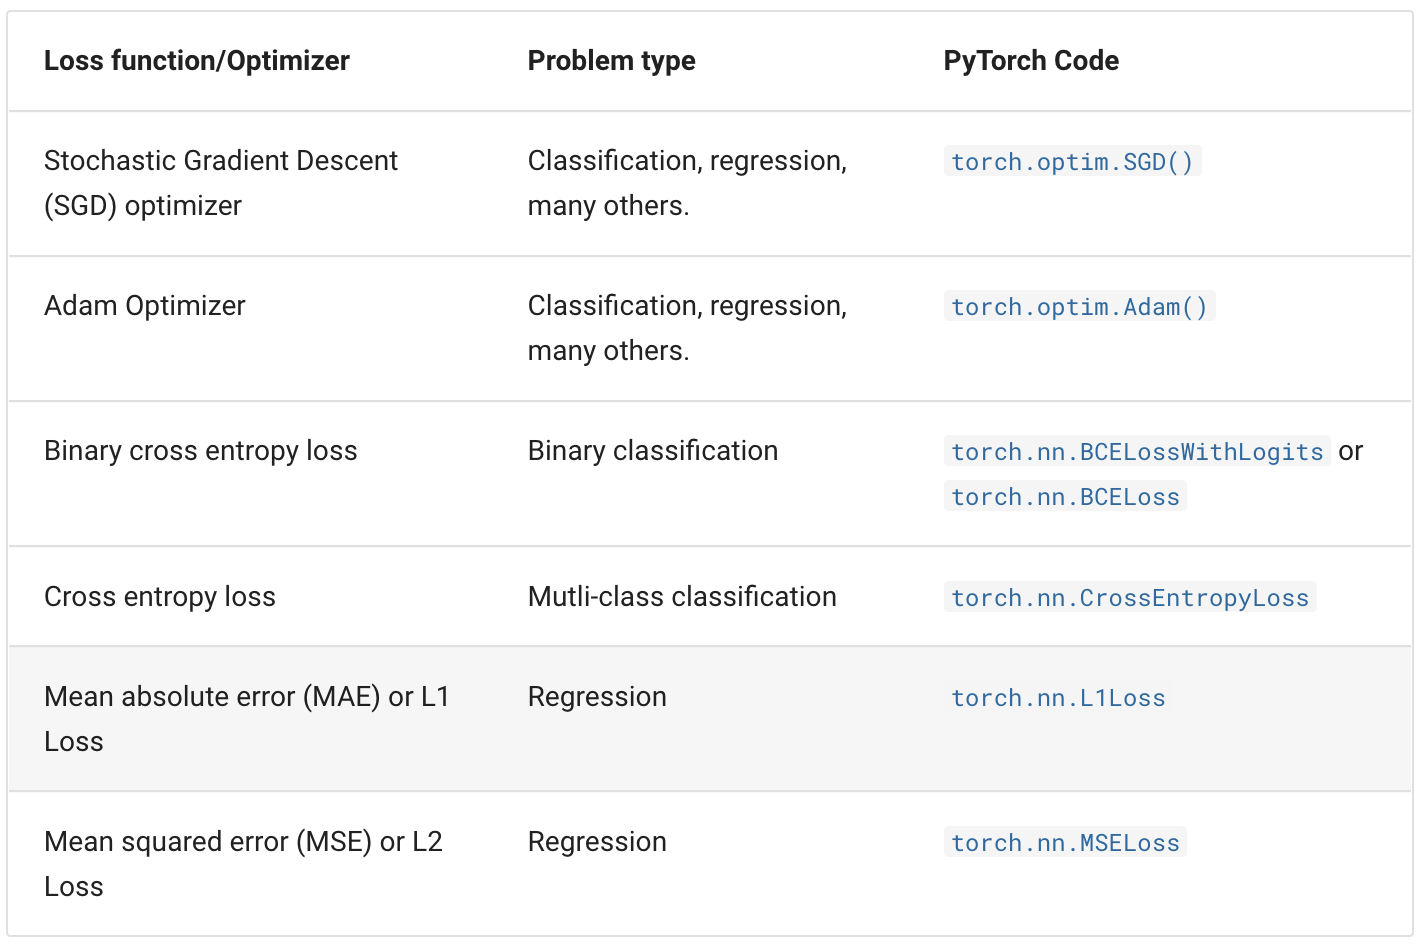

PyTorch has two binary cross entropy implementations:

1. torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).

2. torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).


In [25]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [19]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

# Train model

Before we training loop steps, let's see what comes out of our model during the forward pass (the forward pass is defined by the `forward()` method).

In [22]:
model_0(x_test.to(device))[:5]

tensor([[ 0.1603],
        [ 0.0727],
        [ 0.3052],
        [ 0.0842],
        [-0.0421]], device='mps:0', grad_fn=<SliceBackward0>)

In [36]:
torch.manual_seed(42)

# Set the number of epochs
epochs=1000

# Put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training ###
    
    # Put model in training mode
    model_0.train()
    
    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(x_train).squeeze() # squeeze to remove extra. `1` dimension, this wom't worl unless model and data are on same device
    ## Check shape of the tensor
    # print(f"Shape with squeeze: {model_0(x_train).squeeze().shape}")
    # print(f"Shape without squeeze: {model_0(x_train).shape}")

    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
    
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #               y_train)
    loss = loss_fn(y_logits, y_train) # Using nn.BCEwithLogitsLoss works with raw logits
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backwards
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testing ###
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss/accuracy
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
        
    if epoch%100==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69787, Test acc: 50.00%
Epoch: 100 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69787, Test acc: 50.00%
Epoch: 200 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69787, Test acc: 50.00%
Epoch: 300 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69788, Test acc: 50.00%
Epoch: 400 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69788, Test acc: 50.00%
Epoch: 500 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69788, Test acc: 50.00%
Epoch: 600 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69788, Test acc: 50.00%
Epoch: 700 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69788, Test acc: 50.00%
Epoch: 800 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69788, Test acc: 50.00%
Epoch: 900 | Loss: 0.69263, Accuracy: 55.00% | Test loss: 0.69788, Test acc: 50.00%


### Use helper_functions

# Make predictions and evaluate the model

In [41]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary    

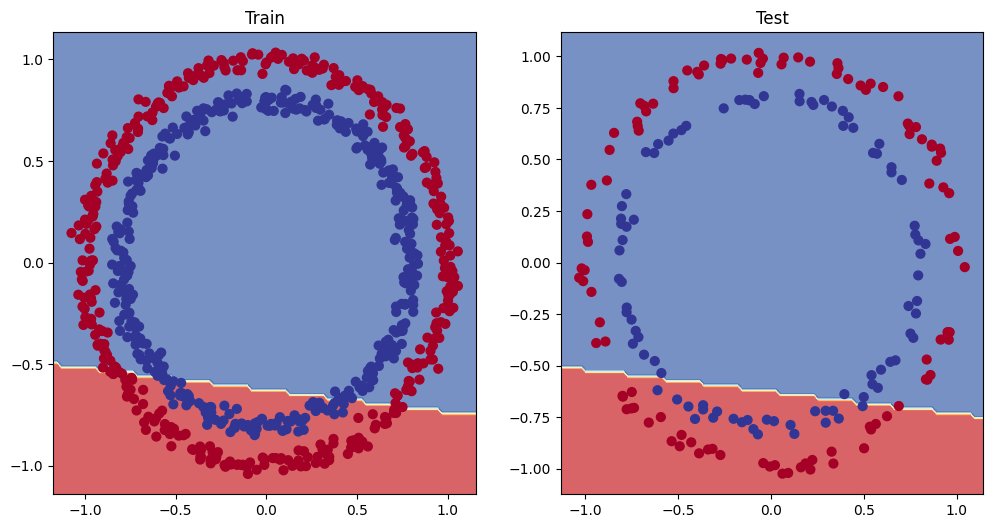

In [43]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)


# Improving a model (from a model perspective)

In [48]:
# ## Our first code

# # 1. Construct a model class that subclasses nn.Module
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # 2. Create 2 nn.Linear layers capable of handling x and y input and output shapes
#         self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and produces 5 features
#         self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
        
#         # 3. Define a forward method containing the forward pass computation
#         def forward(self, x):
#             # Return the output of layer_2, a single feature, the same shape as y
#             return self.layer_2(self.layer_1(x)) # computation goes thtough layer_1 first then the output of layer_1 goes through layer_2
        
# # 4. Create an instance of the model and send it to target device
# model_0 = CircleModelV0().to(device)
# model_0


In [55]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # notr: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [56]:
# Make predictions with the model
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

## Create model_1

In [64]:
print(device)

mps


In [63]:
torch.manual_seed(42)

epochs=1000 # Train for longer

# Put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### TRAINING ###
    # 1. Forward pass
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backwards
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### TESTING ###
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss/accuracy
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)
        
    # Print out
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.3f}% | Test loss: {test_loss:.5f}, Test accuracy: {test_acc:.3f}")

Epoch: 0 | Loss: 0.69357, Accuracy: 51.250% | Test loss: 0.69423, Test accuracy: 48.000
Epoch: 100 | Loss: 0.69270, Accuracy: 56.500% | Test loss: 0.69674, Test accuracy: 52.000
Epoch: 200 | Loss: 0.69264, Accuracy: 57.000% | Test loss: 0.69746, Test accuracy: 52.500
Epoch: 300 | Loss: 0.69263, Accuracy: 54.875% | Test loss: 0.69773, Test accuracy: 50.500
Epoch: 400 | Loss: 0.69263, Accuracy: 54.625% | Test loss: 0.69782, Test accuracy: 50.000
Epoch: 500 | Loss: 0.69263, Accuracy: 54.875% | Test loss: 0.69786, Test accuracy: 50.000
Epoch: 600 | Loss: 0.69263, Accuracy: 55.000% | Test loss: 0.69787, Test accuracy: 50.000
Epoch: 700 | Loss: 0.69263, Accuracy: 55.000% | Test loss: 0.69787, Test accuracy: 50.000
Epoch: 800 | Loss: 0.69263, Accuracy: 55.000% | Test loss: 0.69787, Test accuracy: 50.000
Epoch: 900 | Loss: 0.69263, Accuracy: 55.000% | Test loss: 0.69787, Test accuracy: 50.000


In [60]:
model_1(x_train).shape, model_1(x_train).squeeze().shape

(torch.Size([800, 1]), torch.Size([800]))

#  The missing piece: non-linearity

## Recreating non-linear data (red and blue circles)

In [93]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples=1000,
                   noise=0.03,
                   random_state=42)

x[0:10], y[0:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

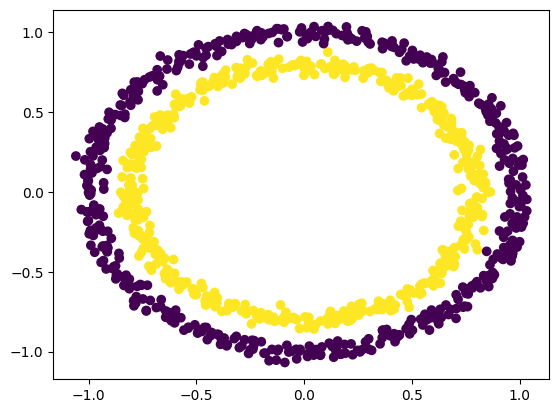

In [94]:
plt.scatter(x[:,0], x[:,1], c=y)

In [95]:
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
x = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## Building a model with non-linearity

In [96]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't to use it  on the prediction
        # self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Intersperse the ReLU activation function between layers
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [97]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss() # Binary Classification
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)

## Traning model_3 with non-linearity

In [99]:
# Fit the model
torch.manual_seed(42)

# Put all data on target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(x_train).squeeze()
    # print(f"y_logits: {y_logits}")
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    # print(f"y_pred: {y_pred}")
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward 
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probability -> prediction labels
        # 2. Calculate loss and accuracy 
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
    
    if epoch%100 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss:{test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.56032, Accuracy: 88.00% | Test Loss:0.57050, Test Accuracy: 84.50%
Epoch: 100 | Loss: 0.47294, Accuracy: 92.25% | Test Loss:0.48729, Test Accuracy: 90.50%
Epoch: 200 | Loss: 0.36039, Accuracy: 96.88% | Test Loss:0.37482, Test Accuracy: 98.00%
Epoch: 300 | Loss: 0.24942, Accuracy: 99.12% | Test Loss:0.26632, Test Accuracy: 99.00%
Epoch: 400 | Loss: 0.17244, Accuracy: 99.38% | Test Loss:0.18791, Test Accuracy: 99.00%
Epoch: 500 | Loss: 0.12320, Accuracy: 99.50% | Test Loss:0.13488, Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.09071, Accuracy: 99.62% | Test Loss:0.10030, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.07146, Accuracy: 99.62% | Test Loss:0.08071, Test Accuracy: 99.00%
Epoch: 800 | Loss: 0.05844, Accuracy: 100.00% | Test Loss:0.06827, Test Accuracy: 99.00%
Epoch: 900 | Loss: 0.04953, Accuracy: 100.00% | Test Loss:0.05967, Test Accuracy: 99.00%


## Evaluating a model trained with non-linear activation functions

In [101]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 1., 1., 0., 0., 0., 1., 0., 0., 1.], device='mps:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

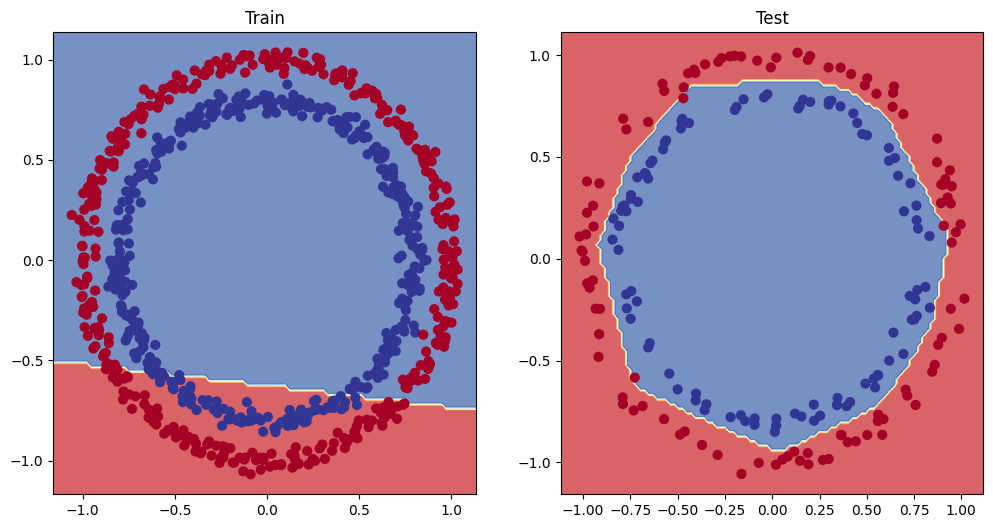

In [103]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test) # model_3 = has non-linearity

# Putting things together by building a multi-class PyTorch model